In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In the context of the "Healthcare Provider Fraud Detection Analysis" dataset, understanding the distinction between **inpatient** and **outpatient** care is crucial:

**Inpatient Care:**
- **Definition:** Treatment provided to patients admitted to a hospital or medical facility, requiring at least one overnight stay.
- **Characteristics:** Involves continuous monitoring and comprehensive care for serious conditions, surgeries, or treatments necessitating prolonged observation.
- **Examples:** Childbirth, major surgeries, severe illnesses, or complex medical conditions requiring intensive care.
  
**Outpatient Care:**
- **Definition:** Medical services rendered to patients who visit a healthcare facility for diagnosis or treatment but do not require an overnight stay.
- **Characteristics:** Suitable for less severe conditions or routine procedures; patients receive care and return home the same day.
- **Examples:** Routine check-ups, minor surgeries, diagnostic tests (e.g., blood tests, X-rays), and therapies like physiotherapy.
This distinction is essential for analyzing healthcare data, as the nature of care impacts billing, resource utilization, and potential fraud detection.

In [3]:
# function to clean column names
def clear_cols(s):
    return s.strip().replace(" ","_")

# load data
path = '../Healthcare Provider Fraud Detection Analysis/Train_Inpatientdata-1542865627584.csv'
df = pd.read_csv(path).rename(columns=clear_cols)
# set display options
pd.set_option('display.max_columns', 50)

In [4]:
# combining the inpatient and beneficiary data
path2 = '../Healthcare Provider Fraud Detection Analysis/Train_Beneficiarydata-1542865627584.csv'
df2 = pd.read_csv(path2).rename(columns=clear_cols)
new_df = df.merge(df2, on='BeneID')


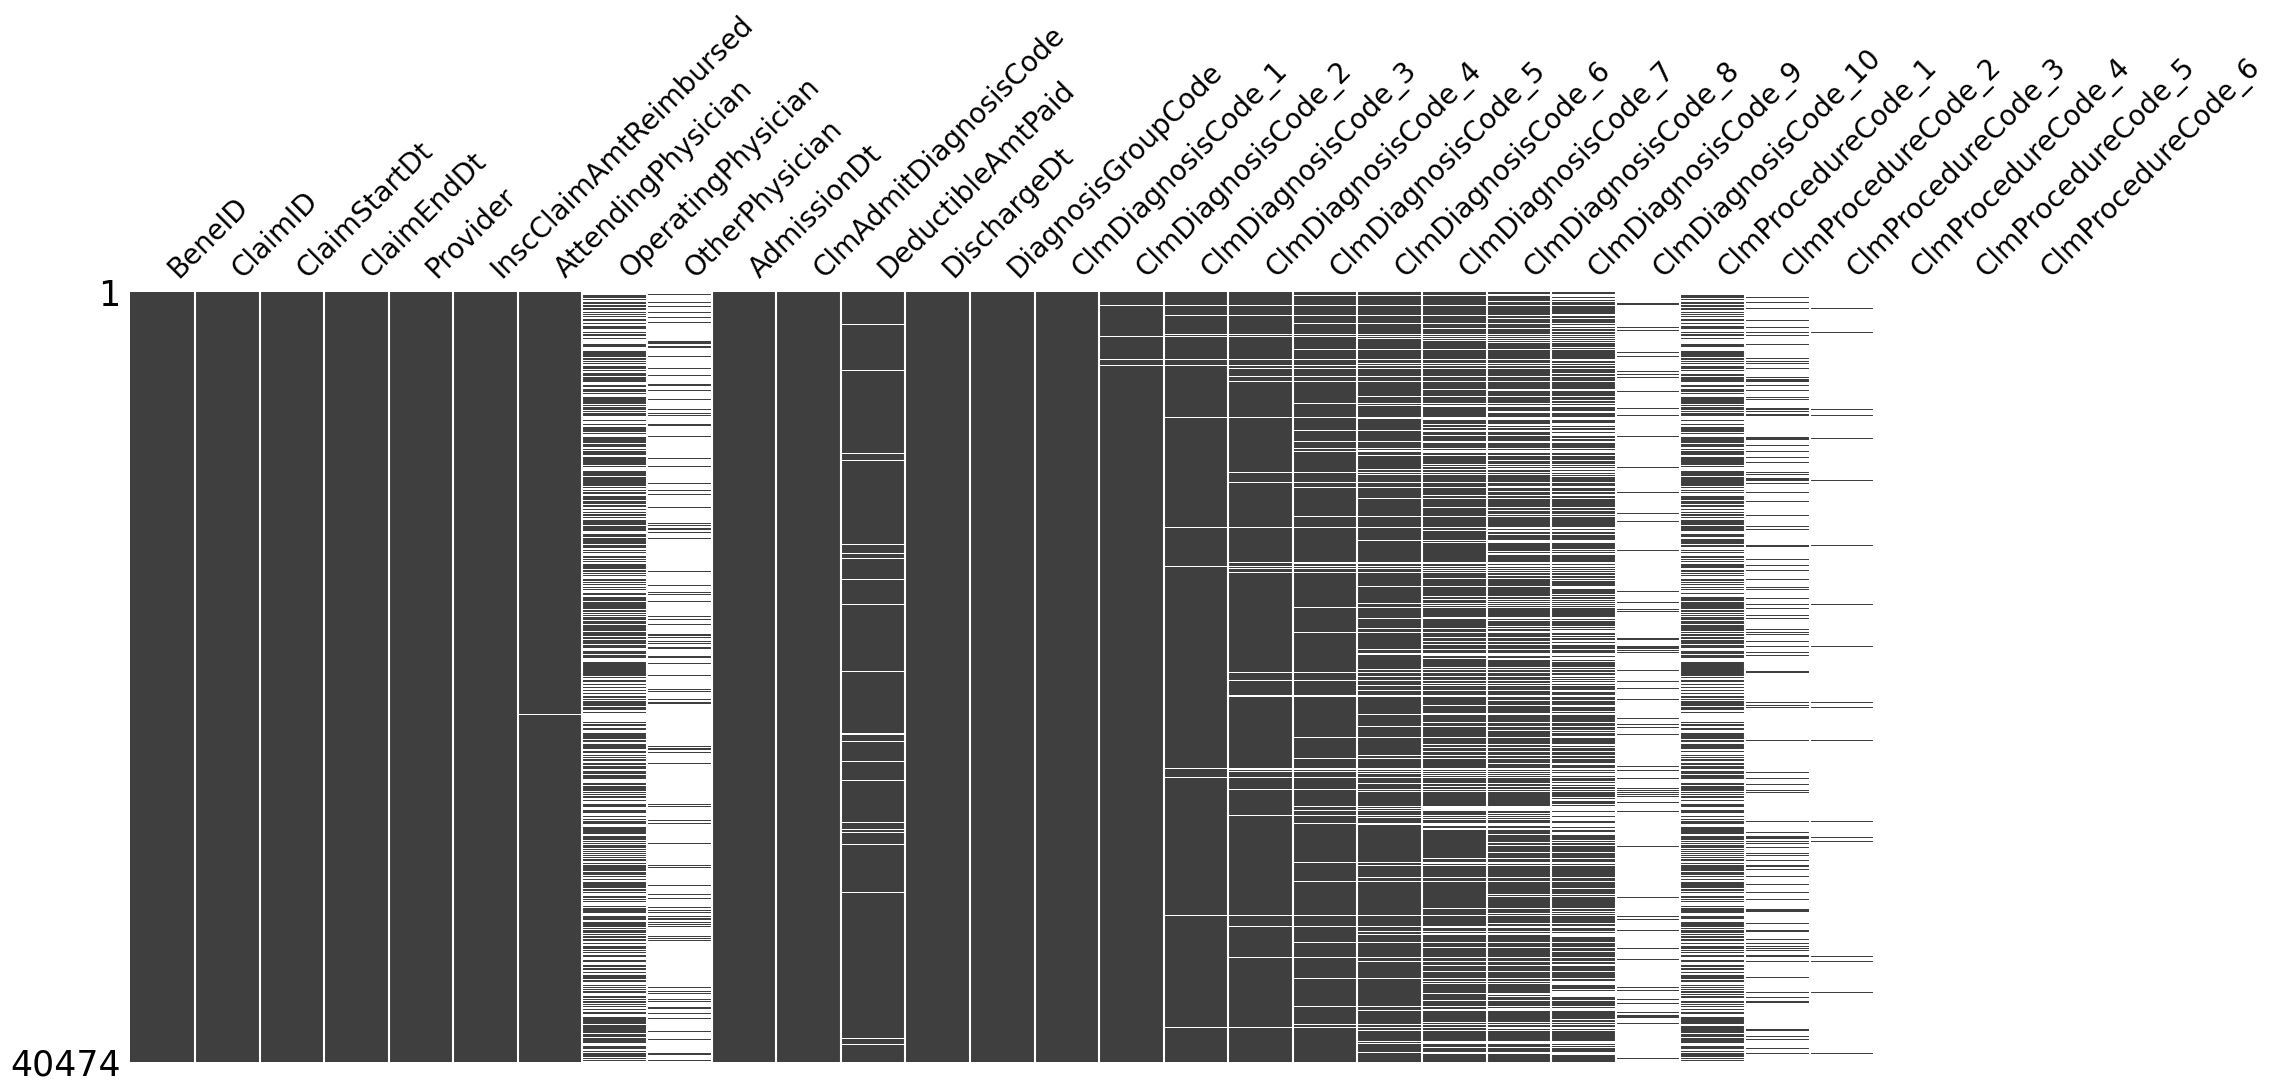

In [5]:
msno.matrix(df, sparkline=False, fontsize=20)
plt.show()

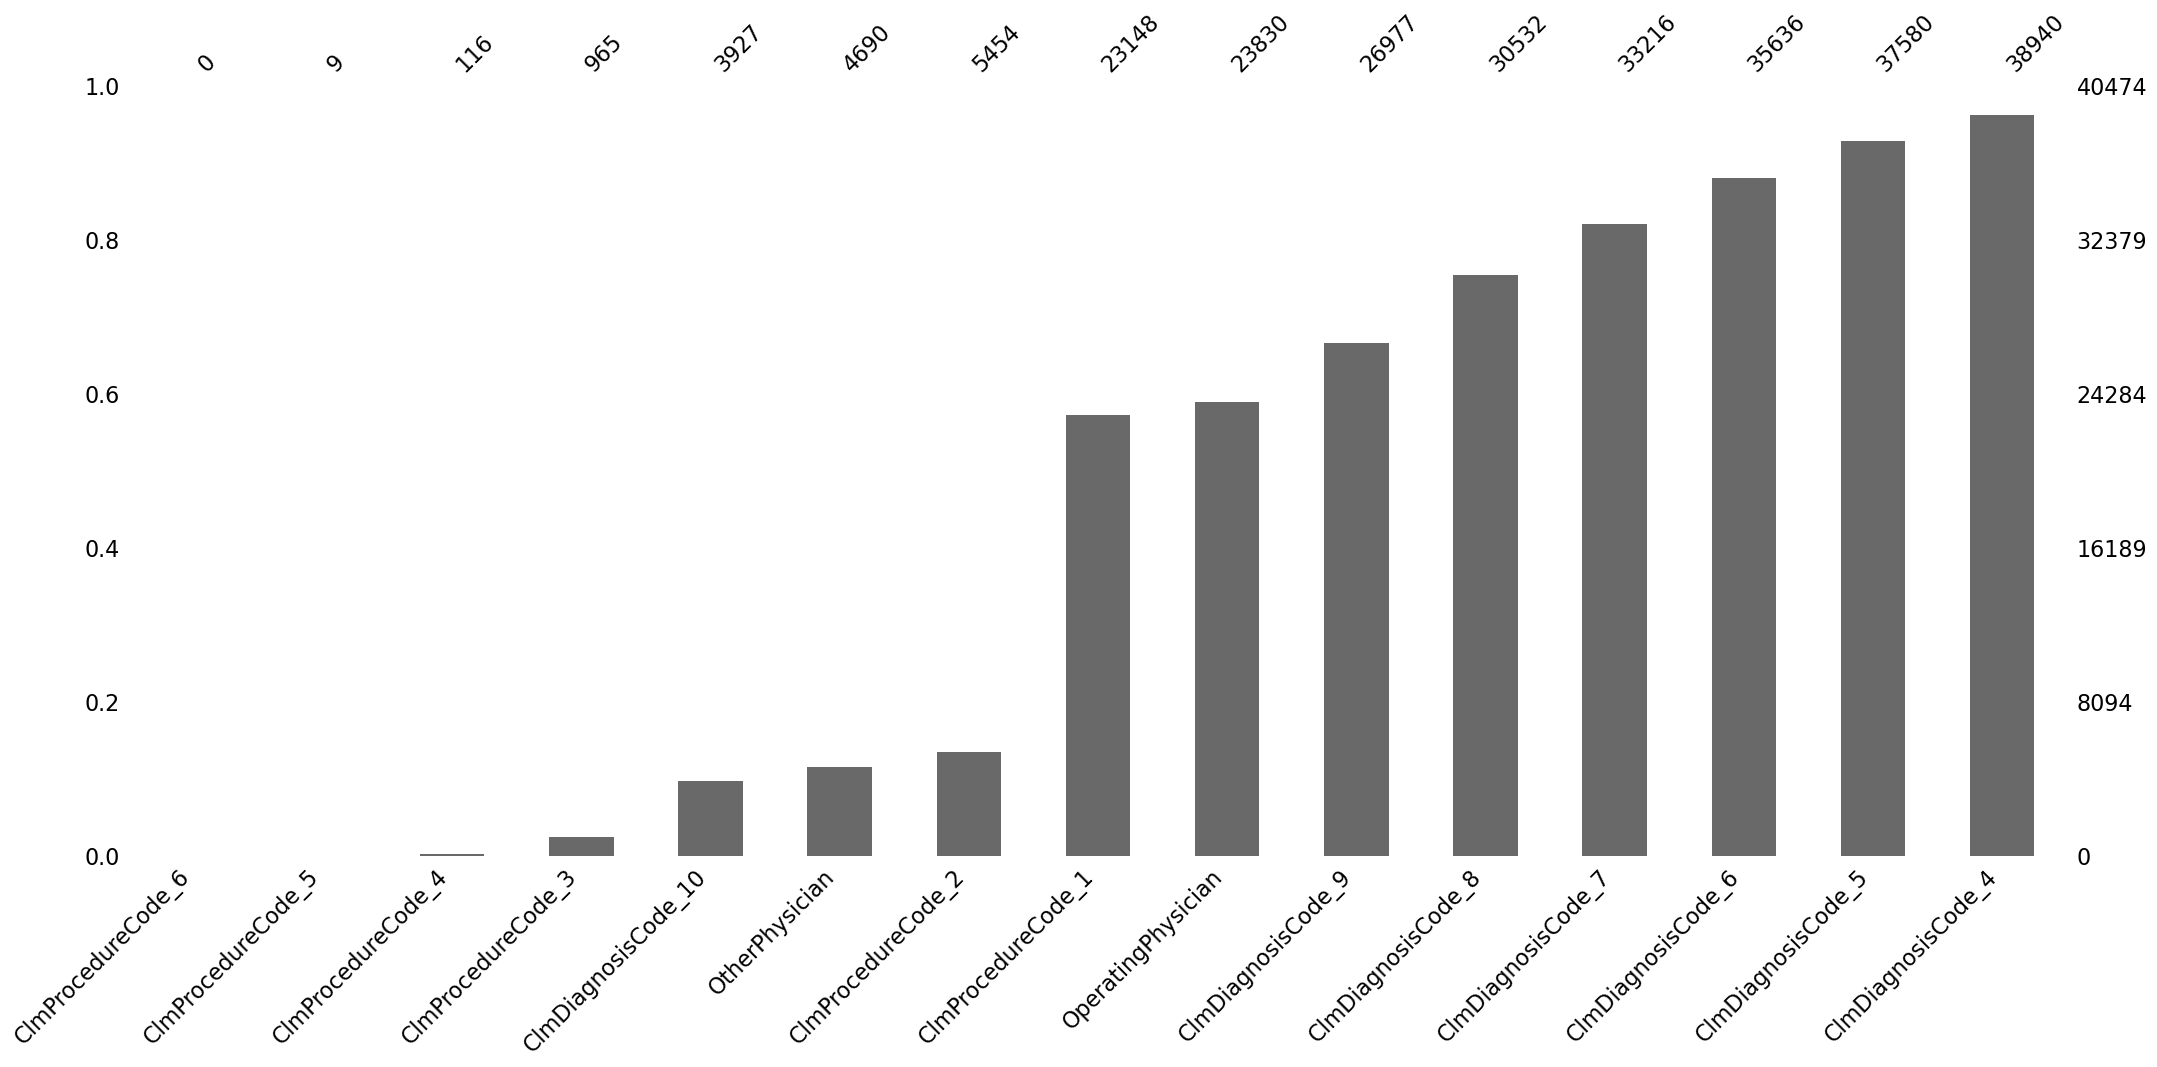

In [6]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sort the DataFrame columns by the percentage of missing values
sorted_df = df[missing_info.sort_values(by='Percentage', ascending=False).index]

# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

#Visual with missingno
msno.bar(top_15_missing)
plt.show()

# <center>Exploratory Data Analysis

In [7]:
print("shape: ", df.shape)
df.head()

shape:  (40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


* Shape of dataset: `40,474` rows, and `30` columns.
* So I have `2,092` Providers in the dataset.
* Number of OperatingPhysician -> `8,287`.
* Number of AttendingPhysician -> `11,604`.
* Number of OtherPhysician  -> `2,877`.
* Claim start date starts at `2008-11-27` and ends at `2009-12-31`.
* Claim end date starts at `2009-01-01` and ends at `2009-12-31`.
  
- In every row we have null values. Should we `fillna` with '0' or leave it like that?


* How many providers and physicians worked together?
* Will it help to plot out the distribution of all the `int` / `float` columns with boxplot?

In [8]:
df.columns.to_list()

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6']

In [9]:
df.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [11]:
print(f"Unique beneid: {df['BeneID'].nunique()}")
print(f"Unique claimid: {df['ClaimID'].nunique()}\n")
print(f"Ratio beneid: {df['BeneID'].nunique()/df.shape[0]}")
print(f"Ratio claimid: {df['ClaimID'].nunique()/df.shape[0]}")

Unique beneid: 31289
Unique claimid: 40474

Ratio beneid: 0.7730641893561299
Ratio claimid: 1.0


### Update data types for columns

I want to update the folowing columns to datetime type: 
* ClaimStartDt  -   `claim start date`
* ClaimEndDt    -   `claim end date`
* AdmissionDt   -   `admission date`
* DischargeDt   -   `discharge date`

In [12]:
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'])
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'])
df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'])
df['DischargeDt'] = pd.to_datetime(df['DischargeDt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

In [13]:
# presentage of missing values
df.isna().sum()/len(df) *100

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.276721
OperatingPhysician         41.122696
OtherPhysician             88.412314
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.221179
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.558383
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_4          3.790087
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_10        90.297475
ClmProcedureCode_1         42.807728
ClmProcedureCode_2         86.524683
ClmProcedureCode_3         97.615753
C

In [14]:
df['DiagnosisGroupCode'].value_counts()

DiagnosisGroupCode
882    179
884    174
166    168
183    165
939    163
      ... 
955      1
934      1
765      1
775      1
768      1
Name: count, Length: 736, dtype: int64

In [15]:
# Converting to integer and checking if there are any non-integer values
def int_check(col):
    """
    To check if all the values in a column are integers.
    col: column to check
    """
    try:
        df[col] = df[col].astype(int)
        print("All values are integers.")
    except ValueError as e:
        print("There are non-integer values in the column.")



In [16]:
# Identify non-integer values using regex
non_integers = df[~df['DiagnosisGroupCode'].str.match(r'^\d+$')]

# Count the non-integer values
non_integer_count = len(non_integers)

print(f"There are {non_integer_count} non-integer values.")


There are 113 non-integer values.


In [17]:
non_integers.nunique()

BeneID                    113
ClaimID                   113
ClaimStartDt               95
ClaimEndDt                100
Provider                  100
InscClaimAmtReimbursed      4
AttendingPhysician        107
OperatingPhysician         50
OtherPhysician              9
AdmissionDt                95
ClmAdmitDiagnosisCode      70
DeductibleAmtPaid           1
DischargeDt               100
DiagnosisGroupCode          1
ClmDiagnosisCode_1         76
ClmDiagnosisCode_2         77
ClmDiagnosisCode_3         81
ClmDiagnosisCode_4         76
ClmDiagnosisCode_5         70
ClmDiagnosisCode_6         76
ClmDiagnosisCode_7         67
ClmDiagnosisCode_8         61
ClmDiagnosisCode_9         53
ClmDiagnosisCode_10        12
ClmProcedureCode_1         35
ClmProcedureCode_2          8
ClmProcedureCode_3          0
ClmProcedureCode_4          0
ClmProcedureCode_5          0
ClmProcedureCode_6          0
dtype: int64

In [18]:
print(f"Number of providers in the dataset -> {df['Provider'].nunique()}.")

Number of providers in the dataset -> 2092.


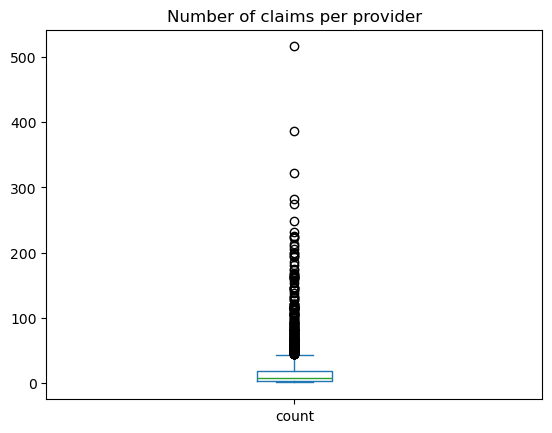

In [19]:
df['Provider'].value_counts().plot(kind='box')
plt.title('Number of claims per provider')
plt.show()

Text(0.5, 1.0, 'Number of claims per provider')

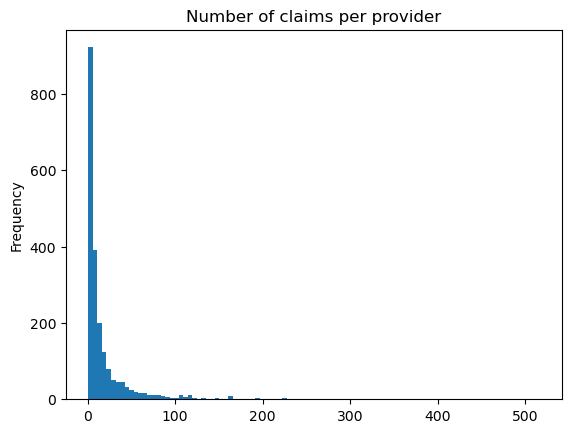

In [20]:
df['Provider'].value_counts().plot(kind='hist', bins=100)
plt.title('Number of claims per provider')

In [21]:
print(f"Number of attendings -> {df['AttendingPhysician'].nunique()}")
# OperatingPhysician

Number of attendings -> 11604


In [22]:
df.groupby('AttendingPhysician')['Provider'].nunique().sort_values(ascending=False)

AttendingPhysician
PHY359004    3
PHY386600    3
PHY395862    3
PHY421048    3
PHY423850    3
            ..
PHY351890    1
PHY351895    1
PHY351896    1
PHY351912    1
PHY434143    1
Name: Provider, Length: 11604, dtype: int64

In [23]:
print(f"Number of OperatingPhysician -> {df['OperatingPhysician'].nunique()}")
print(f"Number of AttendingPhysician -> {df['AttendingPhysician'].nunique()}")
print(f"Number of OtherPhysician  -> {df['OtherPhysician'].nunique()}")

Number of OperatingPhysician -> 8287
Number of AttendingPhysician -> 11604
Number of OtherPhysician  -> 2877


In [24]:
# Claim start date starts at 2008-11-27 and ends at 2009-12-31
df['ClaimStartDt'].min(), df['ClaimStartDt'].max()

(Timestamp('2008-11-27 00:00:00'), Timestamp('2009-12-31 00:00:00'))

In [25]:
# Claim end date starts at 2009-01-01 and ends at 2009-12-31
df['ClaimEndDt'].min(), df['ClaimEndDt'].max()

(Timestamp('2009-01-01 00:00:00'), Timestamp('2009-12-31 00:00:00'))

<Axes: ylabel='count'>

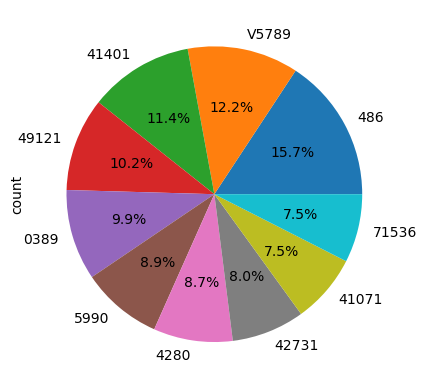

In [26]:

df['ClmDiagnosisCode_1'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

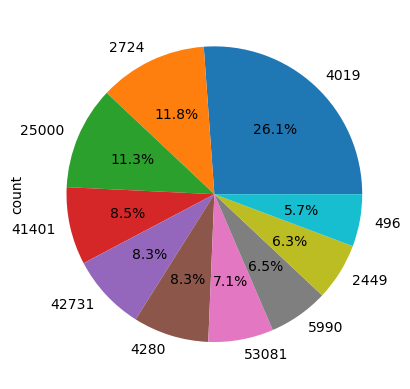

In [27]:
df['ClmDiagnosisCode_2'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

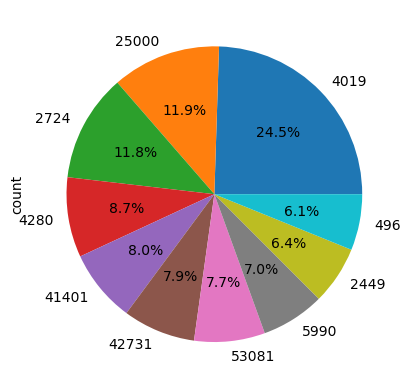

In [28]:
df['ClmDiagnosisCode_3'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')


In [29]:
df.mode().iloc[0]

BeneID                             BENE134170
ClaimID                              CLM31001
ClaimStartDt              2009-02-10 00:00:00
ClaimEndDt                2009-02-11 00:00:00
Provider                             PRV52019
InscClaimAmtReimbursed                 4000.0
AttendingPhysician                  PHY422134
OperatingPhysician                  PHY429430
OtherPhysician                      PHY416093
AdmissionDt               2009-02-10 00:00:00
ClmAdmitDiagnosisCode                   78650
DeductibleAmtPaid                      1068.0
DischargeDt               2009-02-11 00:00:00
DiagnosisGroupCode                        882
ClmDiagnosisCode_1                        486
ClmDiagnosisCode_2                       4019
ClmDiagnosisCode_3                       4019
ClmDiagnosisCode_4                       4019
ClmDiagnosisCode_5                       4019
ClmDiagnosisCode_6                       4019
ClmDiagnosisCode_7                       4019
ClmDiagnosisCode_8                

In [30]:
df['DeductibleAmtPaid'].value_counts()

DeductibleAmtPaid
1068.0    39575
Name: count, dtype: int64

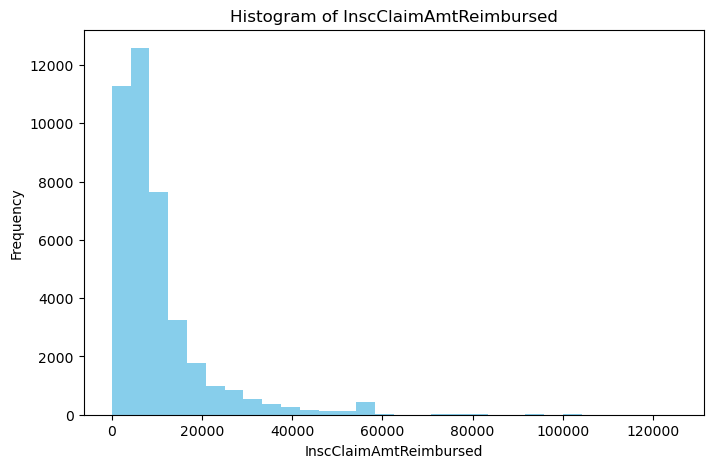

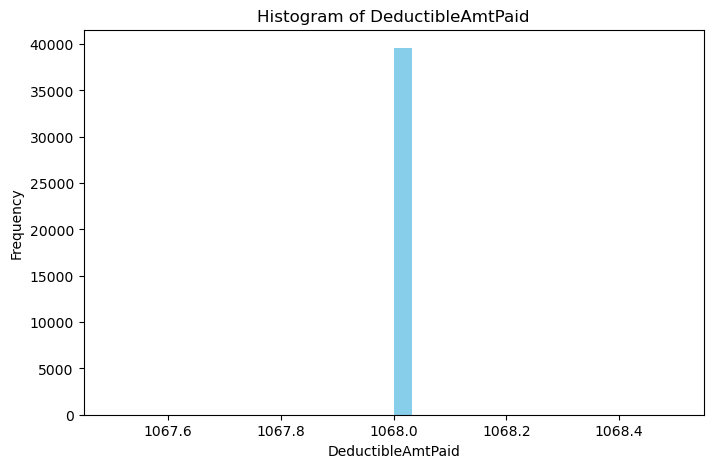

In [31]:

def plot_hist(cols):
    """
    Plots histograms for the specified columns in the dataframe.

    Parameters:
        cols (list): List of column names to plot.
    """
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            df[col].plot(kind='hist', bins=30, color='skyblue')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()

# plot histograms for the following columns
plot_hist(['InscClaimAmtReimbursed', 'DeductibleAmtPaid'])

In [32]:
# I want to generate the top 10 values for each diagnosis code column
# Get all diagnosis code columns
diag_cols = [f'ClmDiagnosisCode_{i}' for i in range(1,11)]

# Create empty dataframe to store top values
top_values = pd.DataFrame()

# Get top 10 values for each column
for col in diag_cols:
    top_values[col] = df[col].value_counts().nlargest(10).index

# Create binary matrix of value occurrences
value_matrix = pd.DataFrame()
all_unique_values = top_values.values.ravel()
all_unique_values = pd.Series(all_unique_values).value_counts()

# Keep only values that appear in multiple columns
repeated_values = all_unique_values[all_unique_values > 1]

# # Create and plot heatmap
# plt.figure(figsize=(15, 8))
# sns.heatmap(top_values.isin(repeated_values.index).T, 
#             cmap='YlOrRd', 
#             cbar_kws={'label': 'Present in Top 10'})
# plt.title('Common Diagnosis Codes Across Columns')
# plt.xlabel('Top 10 Rank Position')
# plt.ylabel('Diagnosis Code Column')
# plt.tight_layout()
# plt.show()

In [33]:
# quick look at top 10 diagnosis codes
top_values

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
0,486,4019,4019,4019,4019,4019,4019,4019,4019,4019
1,V5789,2724,25000,2724,2724,25000,25000,25000,2724,25000
2,41401,25000,2724,25000,25000,2724,2724,2724,25000,2724
3,49121,41401,4280,41401,41401,4280,41401,41401,4280,4280
4,0389,42731,41401,42731,42731,42731,42731,4280,42731,41401
5,5990,4280,42731,4280,4280,41401,4280,42731,41401,53081
6,4280,53081,53081,53081,53081,53081,53081,5990,5990,5990
7,42731,5990,5990,5990,2449,5990,5990,53081,496,2449
8,41071,2449,2449,2449,5990,2449,2449,2449,53081,40390
9,71536,496,496,496,496,496,496,496,2449,42731


# Starting to work on the Inpatient and Beneficiary data together

In [34]:
# quick look at the data
new_df.sample(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,...,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
38964,BENE153847,CLM46539,2009-04-11,2009-04-14,PRV52072,15000,PHY427660,NaN,NaN,2009-04-11,29020,1068.0,2009-04-14,887,2948,04119,7837,311,5859,V4501,4019,NaN,NaN,NaN,NaN,...,NaN,1916-07-01,NaN,1,1,Y,10,520,12,12,1,1,1,2,2,1,1,1,1,2,2,15210,1068,4990,1420
33349,BENE133110,CLM32746,2009-01-06,2009-01-11,PRV54561,0,PHY414183,NaN,NaN,2009-01-06,78650,1068.0,2009-01-11,000,25063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1921-11-01,NaN,2,1,Y,28,410,12,12,1,2,1,2,2,1,1,1,2,1,2,0,1068,5710,210
35727,BENE142247,CLM62907,2009-08-07,2009-08-10,PRV52876,11000,PHY381226,PHY403737,NaN,2009-08-07,71531,1068.0,2009-08-10,457,71531,V4364,E8889,07070,41401,NaN,NaN,NaN,NaN,NaN,8180.0,...,NaN,1933-03-01,NaN,1,1,0,15,780,12,12,2,2,2,2,1,2,2,1,2,1,2,16000,2136,1490,1150


In [35]:
# Convert the dates to datetime
new_df['DOB'] = pd.to_datetime(new_df['DOB'])
new_df['DOD'] = pd.to_datetime(new_df['DOD'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   BeneID                           40474 non-null  object        
 1   ClaimID                          40474 non-null  object        
 2   ClaimStartDt                     40474 non-null  object        
 3   ClaimEndDt                       40474 non-null  object        
 4   Provider                         40474 non-null  object        
 5   InscClaimAmtReimbursed           40474 non-null  int64         
 6   AttendingPhysician               40362 non-null  object        
 7   OperatingPhysician               23830 non-null  object        
 8   OtherPhysician                   4690 non-null   object        
 9   AdmissionDt                      40474 non-null  object        
 10  ClmAdmitDiagnosisCode            40474 non-null  object   

In [36]:
def val_count(col):
    """
    To get the value counts of a column.
    col: column to get value counts
    """
    for i in col:
        print(f"Value counts for: {df[i].value_counts()}:")
        print("***********************\n\n")

In [37]:
df.columns.to_list()

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6']

In [38]:
lst = [ 'Provider',
        'InscClaimAmtReimbursed',
        'AttendingPhysician',
        'OperatingPhysician',
        'OtherPhysician',
        'AdmissionDt',
        'ClmAdmitDiagnosisCode',
        'DeductibleAmtPaid',
        'DischargeDt',
        'DiagnosisGroupCode',
        'ClmDiagnosisCode_1',
        'ClmDiagnosisCode_2',
        'ClmDiagnosisCode_3',
        'ClmDiagnosisCode_4',
        'ClmDiagnosisCode_5',
        'ClmDiagnosisCode_6',
        'ClmDiagnosisCode_7',
        'ClmDiagnosisCode_8',
        'ClmDiagnosisCode_9',
        'ClmDiagnosisCode_10',
        'ClmProcedureCode_1',
        'ClmProcedureCode_2',
        'ClmProcedureCode_3',
        'ClmProcedureCode_4',
        'ClmProcedureCode_5',
        'ClmProcedureCode_6']
val_count(lst)

Value counts for: Provider
PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
           ... 
PRV56174      1
PRV53279      1
PRV57650      1
PRV54373      1
PRV51812      1
Name: count, Length: 2092, dtype: int64:
***********************


Value counts for: InscClaimAmtReimbursed
4000     4506
5000     3996
3000     3852
6000     3318
7000     2837
         ... 
94000       1
6300        1
64000       1
91000       1
66000       1
Name: count, Length: 146, dtype: int64:
***********************


Value counts for: AttendingPhysician
PHY422134    386
PHY341560    274
PHY315112    208
PHY411541    198
PHY362864    195
            ... 
PHY331802      1
PHY412811      1
PHY423120      1
PHY333464      1
PHY393635      1
Name: count, Length: 11604, dtype: int64:
***********************


Value counts for: OperatingPhysician
PHY429430    225
PHY341560    153
PHY411541    121
PHY352941    110
PHY314410    109
            ... 
PHY323907      1
PHY334544      1
PHY3

In [39]:
df.sample()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
20887,BENE87452,CLM60980,2009-07-24,2009-07-28,PRV55193,6000,PHY397979,NaN,NaN,2009-07-24,49121,1068.0,2009-07-28,175,49122,24900,40390,V0382,42731,5990,41401,4011,53081,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df['NumDaysHospitalize'] = df['DischargeDt'] - df['AdmissionDt']

In [41]:

hospitalize = df['NumDaysHospitalize'].value_counts().reset_index().sort_values(by='NumDaysHospitalize')
hospitalize.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 11 to 16
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   NumDaysHospitalize  36 non-null     timedelta64[ns]
 1   count               36 non-null     int64          
dtypes: int64(1), timedelta64[ns](1)
memory usage: 864.0 bytes


In [42]:
import plotly.express as px

fig = px.bar(
    hospitalize,
    x="NumDaysHospitalize",
    y="count",
    labels={"time_diff_days": "Time Difference (Days)", "count": "Count"},
    title="Bar Plot of Time Difference vs. Count",
    template="plotly_white"
)
# fig = px.bar(hospitalize,x='NumDaysHospitalize',y='count', title='Bar Plot')
fig.show()

In [43]:
# Group by 'Provider' to count unique beneficiaries and claims
provider_stats = df.groupby('Provider').agg(
    num_beneficiaries=('BeneID', 'nunique'),  # Count unique beneficiaries
    num_claims=('ClaimID', 'count')          # Count total claims
).reset_index()
provider_stats.head()

,Provider,num_beneficiaries,num_claims
0,PRV51001,5,5
1,PRV51003,53,62
2,PRV51007,3,3
3,PRV51008,2,2
4,PRV51011,1,1


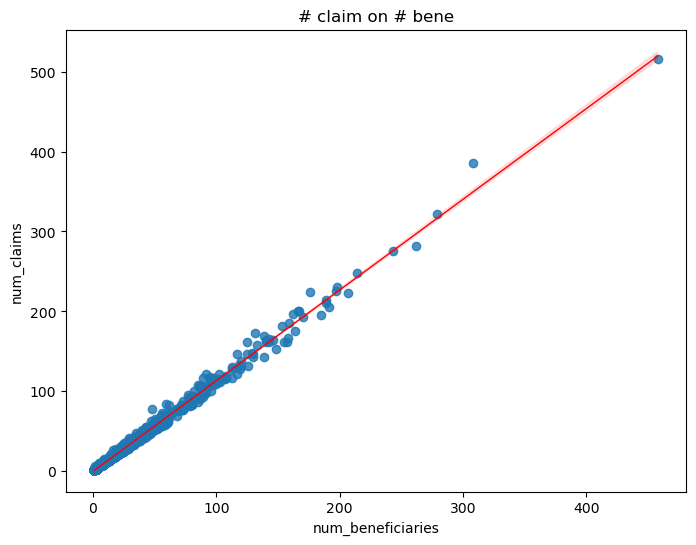

In [44]:
# scatter plot to demonstrate the number of bene by num of claims
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=provider_stats['num_beneficiaries'], 
            y=provider_stats['num_claims'],
            line_kws={'color':'red', 'linewidth':1},
            ax=ax)

plt.title('# claim on # bene')
plt.show()

In [ ]:
# It's just show too many for now, and it's not completley relevant but the format could be useful for later

# plt.figure(figsize=(8, 6))  # Set the figure size as needed
# sns.barplot(x=provider_stats['num_beneficiaries'], 
#             y=provider_stats['num_claims'], palette="tab20", legend=True)
# plt.xticks(rotation=45) # Rotate the country names for better readability
# plt.title('Top 20 providers and number of beneficiary')
# plt.xlabel('providers')
# plt.ylabel('beneficiary')
# plt.tight_layout()  # Adjust layout to fit all labels
# plt.show()

In [46]:
# adding train dataset with PotentialFraud here. need to fix the `merge`
train_path = '../Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
train_df = pd.read_csv(train_path).rename(columns=clear_cols)
new_df = provider_stats.merge(train_df, on='Provider', how='left')
new_df.sample(8)

,Provider,num_beneficiaries,num_claims,PotentialFraud
567,PRV52500,7,7,No
1328,PRV55161,2,2,No
1022,PRV54216,10,10,No
1295,PRV55118,2,2,No
1783,PRV56711,7,8,Yes
80,PRV51190,3,3,No
2080,PRV57702,5,7,No
739,PRV53119,3,3,Yes


In [49]:
# plt.figure(figsize=(8, 6))  # Set the figure size as needed
# sns.barplot(x=new_df.Provider, y=new_df.BeneID, palette="tab20")
# plt.xticks(rotation=45) # Rotate the country names for better readability
# plt.title('Top 20 providers and number of beneficiary')
# plt.xlabel('providers')
# plt.ylabel('beneficiary')
# # plt.tight_layout()  # Adjust layout to fit all labels
# plt.show()

In [50]:
# new_df.sample(20)

# This is completley wrong. I need more time to understand what I want to do here with the grouping

In [54]:
# # Create a bar plot with Provider on x-axis and BeneID on y-axis
# plt.figure(figsize=(10,6))
# plt.bar(new_df['num_claims'], new_df['num_beneficiaries'])

# # Add labels to the axes
# plt.xlabel('Providers')
# plt.ylabel('Beneficiary IDs (Top 15)')

# # Set title for the plot
# plt.title('Top 15 Beneficiaries by ID')

# # Show values on top of each bar
# # for i, v in enumerate(new_df['BeneID']):
# #     plt.text(i, v + 5, str(v), color='black', ha="center")

# plt.xticks(rotation=45)
# # Display the plot
# plt.show()